# Analysis of Prox-seq data

Author: Hoang Van Phan

Address: Pritzker School of Molecular Engineering
         The University of Chicago
         Chicago, IL 60637, USA

## Analysis of single-cell Prox-seq data

This notebook shows how to predict complex abundance from the Prox-seq count data.

#### Import packages and the custom functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import ProxseqFunctions as PF

#### Import data

In [2]:
dge = pd.read_csv("example_dge.csv", index_col=0)
dge.iloc[:6,:6]

,ST-VP-4S-S40-Tcells-separate_S40_R1_001,ST-VP-4S-S43-Tcells-separate_S43_R1_001,ST-VP-4S-S51-Tcells-separate_S51_R1_001,ST-VP-4S-S77-Tcells-separate_S77_R1_001,ST-VP-4S-S50-Tcells-separate_S50_R1_001,ST-VP-4S-S79-Tcells-separate_S79_R1_001
CD3:CD3,35,8,385,52,132,48
CD3:CD28,29,3,34,26,60,3
CD3:CD45RA,0,0,0,0,0,0
CD3:CD4,0,0,1,1,0,0
CD3:PD1,16,15,39,77,41,8
CD3:LFA1,0,0,1,0,0,0


#### Plot observed vs expected PLA count

Plot the observed PLA count against expected count of three protein targets, CD3, CD28 and PD1.

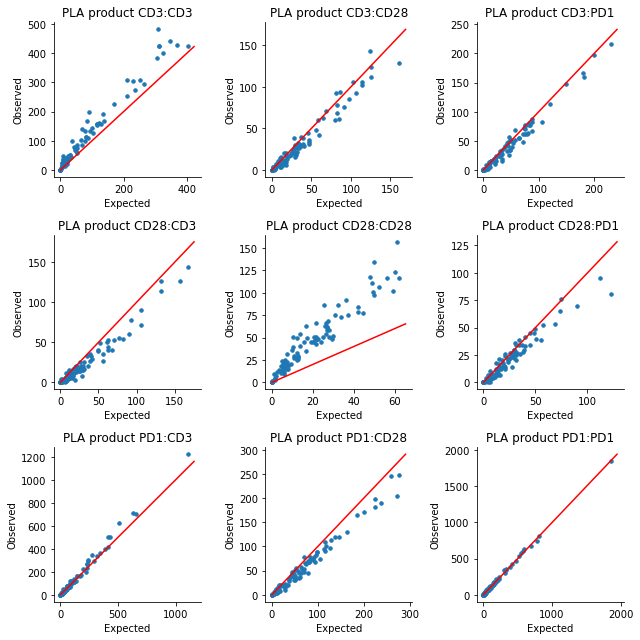

In [3]:
# Calculate expected PLA count
dge_expected = PF.calculateExpected(dge)

# Plot
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(9,9))
for row_i, value1 in enumerate(["CD3","CD28","PD1"]):
    for col_i, value2 in enumerate(["CD3","CD28","PD1"]):
        ax[row_i,col_i].scatter(dge_expected.loc[f"{value1}:{value2}",:], dge.loc[f"{value1}:{value2}",:], s=12)
        _, xmax = ax[row_i,col_i].get_xlim()
        ax[row_i,col_i].plot([0,xmax],[0,xmax], 'red')
        ax[row_i,col_i].set_xlabel("Expected")
        ax[row_i,col_i].set_ylabel("Observed")
        ax[row_i,col_i].set_title(f"PLA product {value1}:{value2}")
sns.despine(fig=fig)
fig.tight_layout()

The red lines show the y=x line. PLA products above the red line likely represent true protein complexes.

The PLA product counts can be analyzed using the Seurat package in RStudio, or used to calculate protein abundance and predict complex abundance as following.

# Calculating protein abundance

This section shows how to calculate protein abundance from the PLA count data. The results would be similar to antibody count data from CITE-seq and REAP-seq.

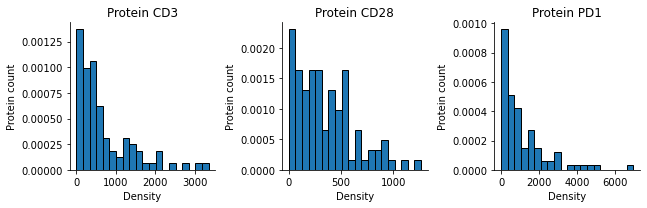

In [4]:
dge_protein = PF.calculateProteinAbundance(dge)

# Plot
fig, ax = plt.subplots(ncols=3, figsize=(9,3))
for i, value in enumerate(["CD3","CD28","PD1"]):
    ax[i].hist(dge_protein.loc[value,:], bins=20, density=True, edgecolor='black')
    ax[i].set_xlabel("Density")
    ax[i].set_ylabel("Protein count")
    ax[i].set_title(f"Protein {value}")
sns.despine(fig=fig)
fig.tight_layout()

## Predicting protein complex abundance

This section shows how to predict the protein complex abundance from the PLA count data.

In [5]:
dge_complex = PF.predictComplex(dge, nIter=200, tol=1)

predictComplex done: Loop number 78, tolerance 0.95


#### Plot estimated complex abundance vs observed PLA product count

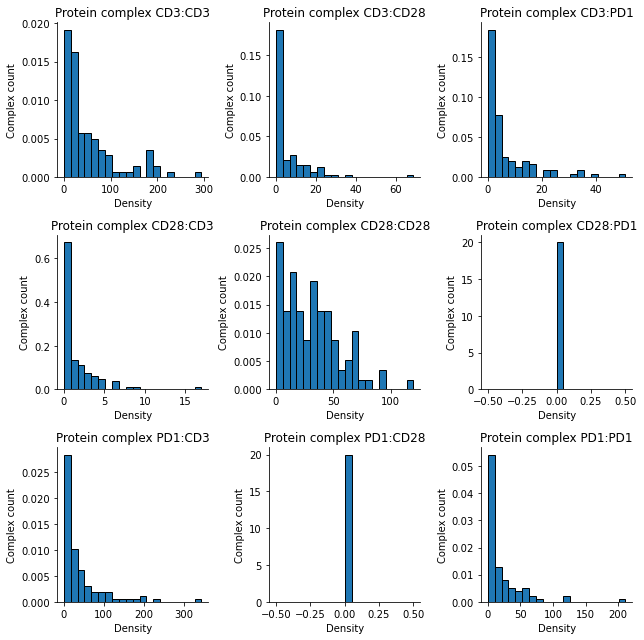

In [6]:
# Plot
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(9,9))
for row_i, value1 in enumerate(["CD3","CD28","PD1"]):
    for col_i, value2 in enumerate(["CD3","CD28","PD1"]):
        ax[row_i,col_i].hist(dge_complex.loc[f"{value1}:{value2}",:], bins=20, density=True, edgecolor='black')
        ax[row_i,col_i].set_xlabel("Density")
        ax[row_i,col_i].set_ylabel("Complex count")
        ax[row_i,col_i].set_title(f"Protein complex {value1}:{value2}")
sns.despine(fig=fig)
fig.tight_layout()

The prediction algorithm predicts that CD3 homodimer and CD28 homodimers are highly expressed, whereas CD28 does not dimerize with PD1.